# SPARKS FOUNDATION
DATA SCIENCE AND BUSINESS ANALYTICS

TASK-1 To predict the percentage of a student based on the no. of study hours

# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


In [2]:
# Reading data from link
url = "http://bit.ly/w-data"
df= pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#information about data
df.shape

(25, 2)

In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

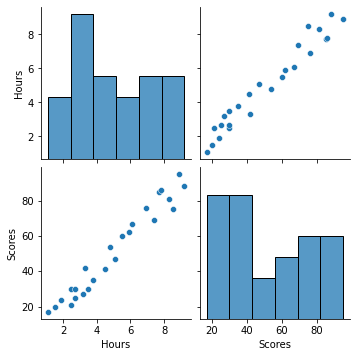

In [5]:
sns.pairplot(data=df)

Text(0, 0.5, 'Percentage Score')

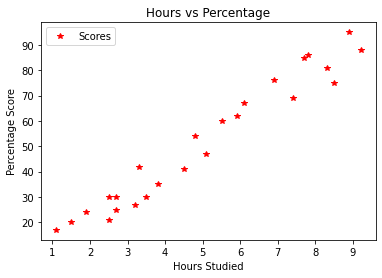

In [6]:
df.plot(x='Hours', y='Scores', style='*',color="red")  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  


In [7]:
#seperating dependent and independent dataset
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values  

In [17]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=99) 
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

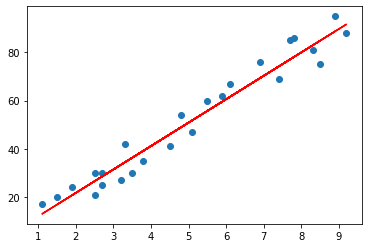

In [18]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='red')

In [19]:
#testing data
print(x_test)

[[7.7]
 [1.9]
 [4.5]
 [2.7]
 [4.8]]


In [20]:
#model prediction
y_pred = regressor.predict(x_test)


In [21]:
#comparing actual vs predicted

new_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(new_df)

   Actual  Predicted
0      85  77.086162
1      24  20.732389
2      41  45.994425
3      30  28.505323
4      54  48.909275


In [22]:
print("Training Score:",regressor.score(x_train,y_train))
print("Test Score:",regressor.score(x_test,y_test))

Training Score: 0.9531400890097337
Test Score: 0.9461394530777263


In [23]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.1462224378299


In [24]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.552255217898516
Mean Squared Error: 25.279986303438385
Root Mean Squared Error: 5.02792067394051
R-2: 0.9461394530777263
